In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

In [40]:
def load_data(data_path="../data/"):
    """Load the credit scoring dataset."""
    # Check if the data directory exists
    if not os.path.exists(data_path):
        raise FileNotFoundError(f"Data directory '{data_path}' not found.")
    
    # Look for CSV files in the data directory
    csv_files = [f for f in os.listdir(data_path) if f.endswith('train.csv')]
    
    if not csv_files:
        raise FileNotFoundError(f"No CSV files found in '{data_path}'.")
    
    # Load the first CSV file found
    file_path = os.path.join(data_path, csv_files[0])
    print(f"Loading data from: {file_path}")
    
    return pd.read_csv(file_path)


In [74]:
df = load_data()
df.head()

Loading data from: ../data/train.csv


/tmp/ipykernel_7807/948120084.py:17: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [78]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [100]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month'],
      dtype='object')

#### Check for missing values.


=== MISSING DATA REPORT ===

Total cells in dataset: 2,800,000
Total missing values: 60,071 (2.15% of all data)
Affected columns: 8 out of 28 columns

Detailed Missing Value Report:
                    Column  Missing_Values  Missing_Percentage_In_Column  \
1    Monthly_Inhand_Salary           15002                         15.00   
2             Type_of_Loan           11408                         11.41   
0                     Name            9985                          9.98   
5       Credit_History_Age            9030                          9.03   
3   Num_of_Delayed_Payment            7002                          7.00   
6  Amount_invested_monthly            4479                          4.48   
4     Num_Credit_Inquiries            1965                          1.96   
7          Monthly_Balance            1200                          1.20   

   Percentage_Of_Total_Missing  
1                        24.97  
2                        18.99  
0                        16.62  


<Figure size 1200x600 with 0 Axes>

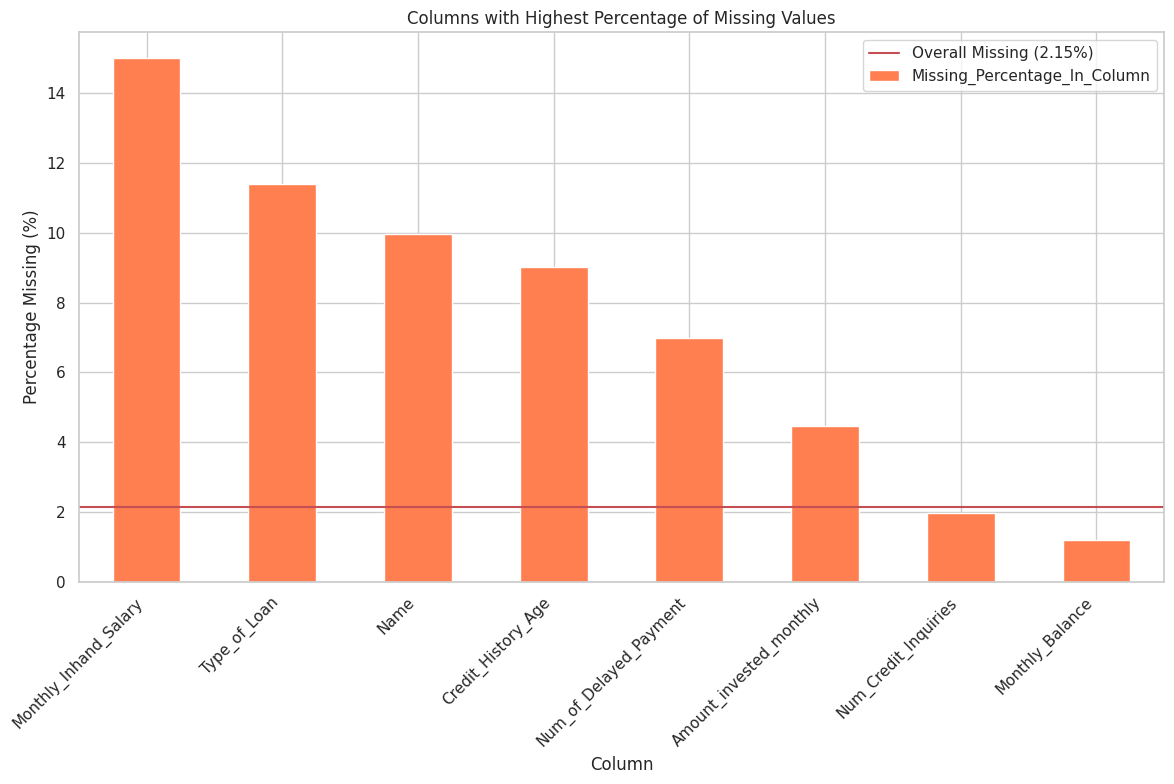

In [92]:
def null_value_report(df):
    """
    Generate a comprehensive report on missing values in the dataframe.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe to analyze for missing values
        
    Returns:
    --------
    pandas.DataFrame
        A dataframe containing missing value statistics
    """
    # Get total number of cells in the dataframe
    total_cells = df.size
    total_rows = len(df)
    
    # Calculate missing values by column
    missing_counts = df.isnull().sum()
    
    # Filter to only columns with missing values
    cols_with_nulls = missing_counts[missing_counts > 0]
    
    if cols_with_nulls.empty:
        print("No missing values found in the dataset.")
        return None
    
    # Create a comprehensive report dataframe
    missing_report = pd.DataFrame({
        'Column': cols_with_nulls.index,
        'Missing_Values': cols_with_nulls.values,
        'Missing_Percentage_In_Column': (cols_with_nulls.values / total_rows * 100).round(2),
        'Percentage_Of_Total_Missing': (cols_with_nulls.values / cols_with_nulls.sum() * 100).round(2)
    }).sort_values('Missing_Values', ascending=False)
    
    # Calculate overall missing data metrics
    total_missing = cols_with_nulls.sum()
    total_missing_percentage = (total_missing / total_cells * 100).round(2)
    
    # Display the report
    print(f"\n=== MISSING DATA REPORT ===\n")
    print(f"Total cells in dataset: {total_cells:,}")
    print(f"Total missing values: {total_missing:,} ({total_missing_percentage}% of all data)")
    print(f"Affected columns: {len(cols_with_nulls)} out of {len(df.columns)} columns")
    print("\nDetailed Missing Value Report:")
    print(missing_report)
    
    # Visualization if there are many columns with nulls
    if len(cols_with_nulls) > 5:
        plt.figure(figsize=(12, 6))
        ax = missing_report.head(10).plot(x='Column', y='Missing_Percentage_In_Column', kind='bar', color='coral', legend=False)
        plt.title('Columns with Highest Percentage of Missing Values')
        plt.ylabel('Percentage Missing (%)')
        plt.xlabel('Column')
        plt.axhline(y=total_missing_percentage, color='r', linestyle='-', label=f'Overall Missing ({total_missing_percentage}%)')
        plt.legend()
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        
        # Show plot in notebook instead of saving it
        plt.show()
    
    return missing_report

# Usage example
report = null_value_report(df)


#### Boxplot for outliers

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_outliers(df, columns=None, figsize=(12, 8), save_path=None):
    """
    Create boxplots to visualize outliers in the specified columns of a dataframe.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataset to analyze
    columns : list or None, optional (default=None)
        List of column names to plot. If None, all numeric columns will be used.
    figsize : tuple, optional (default=(12, 8))
        Figure size (width, height) in inches
    save_path : str or None, optional (default=None)
        Path to save the figure. If None, the figure will be displayed but not saved.
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The figure object containing the boxplots
    """
    # If no columns specified, use all numeric columns
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns.tolist()
    
    # Create the figure and subplots
    fig, axes = plt.subplots(len(columns), 1, figsize=figsize)
    
    # If only one column, axes won't be an array, so we convert it to a list
    if len(columns) == 1:
        axes = [axes]
    
    # Plot each column
    for i, column in enumerate(columns):
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Boxplot of {column}')
        axes[i].set_xlabel('')
        
        # Add grid lines for better readability
        axes[i].grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    
    # Save the figure if path is provided
    if save_path:
        plt.savefig(save_path)
    
    return fig

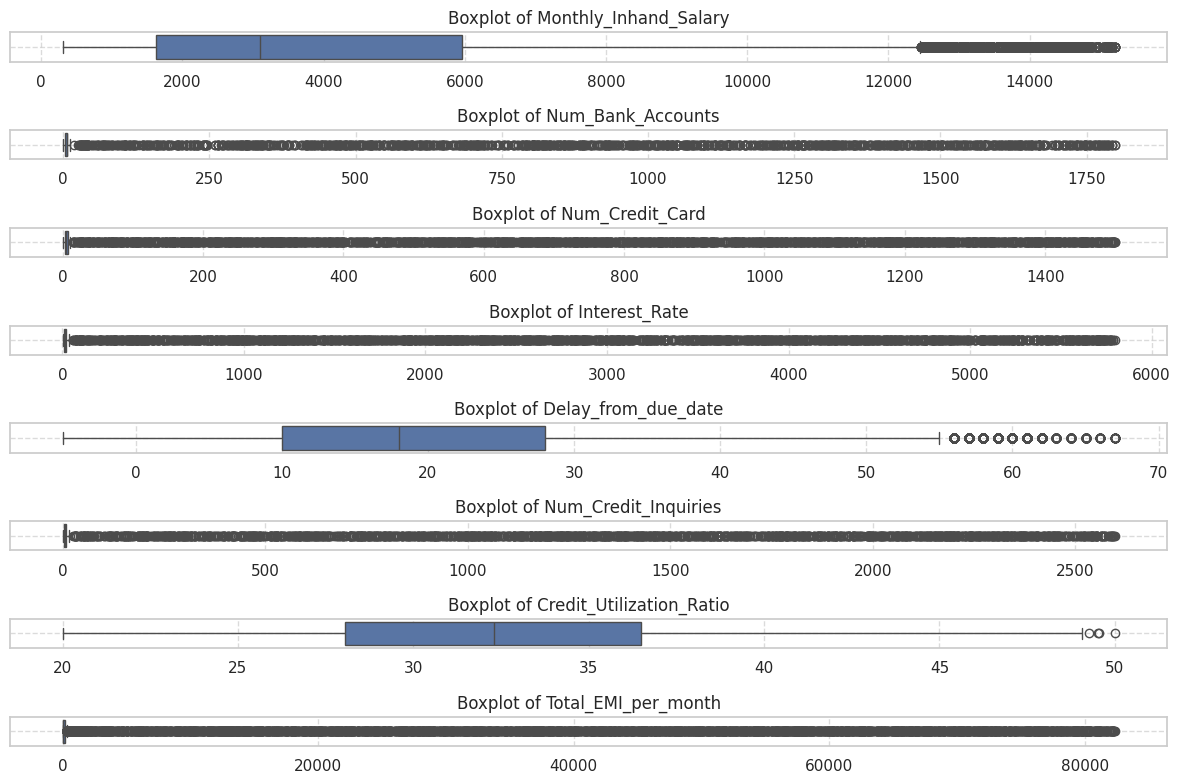

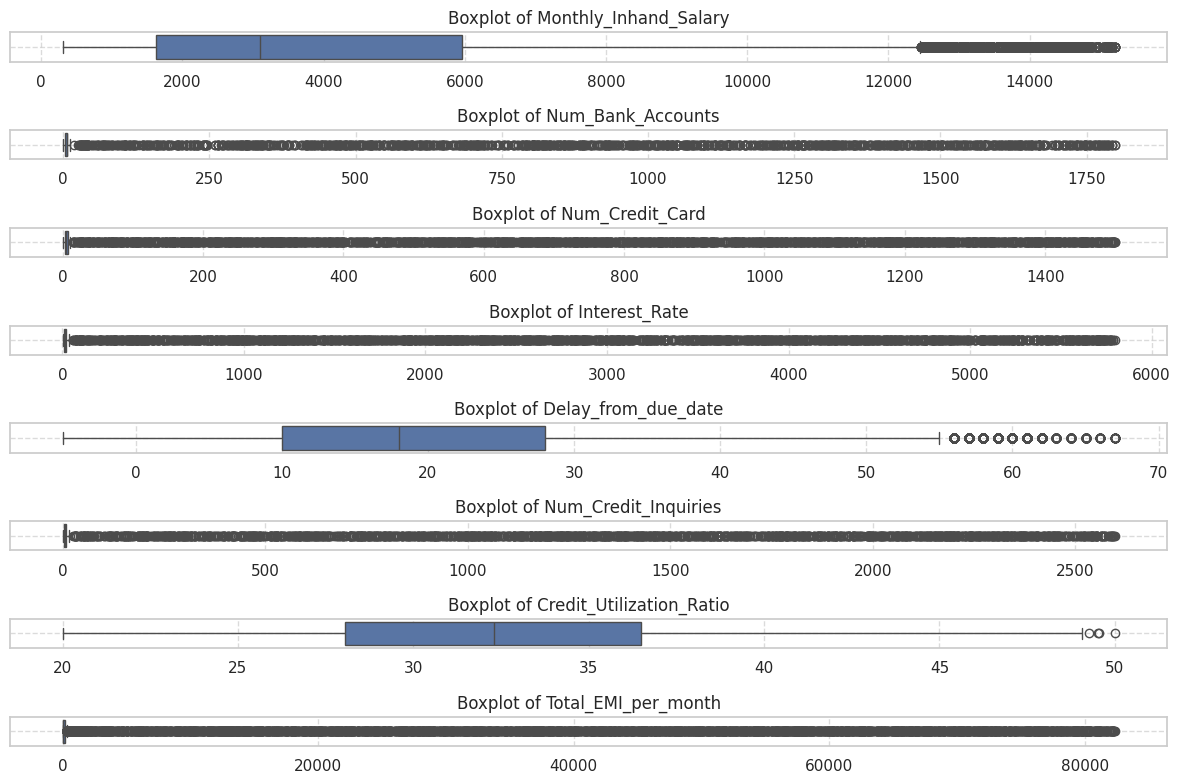

In [102]:
visualize_outliers(df, columns=numerical_columns)

#### Correlation

In [112]:
df[numerical_columns].corr()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
Monthly_Inhand_Salary,1.000000,-0.010819,-0.005049,-0.006422,-0.250100,-0.008867,0.173192,0.007264
Num_Bank_Accounts,-0.010819,1.000000,-0.002216,-0.003998,0.015966,-0.001683,-0.001365,-0.001433
Num_Credit_Card,-0.005049,-0.002216,1.000000,-0.004012,0.008715,-0.003479,-0.003341,0.000768
Interest_Rate,-0.006422,-0.003998,-0.004012,1.000000,0.009792,-0.001681,-0.000359,0.002517
Delay_from_due_date,-0.250100,0.015966,0.008715,0.009792,1.000000,0.011508,-0.063796,-0.003889
Num_Credit_Inquiries,-0.008867,-0.001683,-0.003479,-0.001681,0.011508,1.000000,0.000145,-0.007031
Credit_Utilization_Ratio,0.173192,-0.001365,-0.003341,-0.000359,-0.063796,0.000145,1.000000,0.001389
Total_EMI_per_month,0.007264,-0.001433,0.000768,0.002517,-0.003889,-0.007031,0.001389,1.000000


In [107]:
def create_correlation_heatmap(df, columns=None, method='pearson', figsize=(12, 10), 
                               cmap='coolwarm', annot=True, mask_upper=False, 
                               save_path=None):
    """
    Create a correlation heatmap to visualize relationships between variables in a dataset.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataset to analyze
    columns : list or None, optional (default=None)
        List of column names to include in the correlation analysis. 
        If None, all numeric columns will be used.
    method : str, optional (default='pearson')
        Method of correlation:
        - 'pearson' : standard correlation coefficient
        - 'kendall' : Kendall Tau correlation coefficient
        - 'spearman' : Spearman rank correlation coefficient
    figsize : tuple, optional (default=(12, 10))
        Figure size (width, height) in inches
    cmap : str, optional (default='coolwarm')
        Colormap for the heatmap
    annot : bool, optional (default=True)
        If True, write the correlation value in each cell
    mask_upper : bool, optional (default=False)
        If True, mask the upper triangle of the correlation matrix
    save_path : str or None, optional (default=None)
        Path to save the figure. If None, the figure will be displayed but not saved.
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The figure object containing the heatmap
    corr_matrix : pandas.DataFrame
        The correlation matrix
    """
    # If no columns specified, use all numeric columns
    if columns is None:
        # Select only numeric columns
        numeric_df = df.select_dtypes(include=[np.number])
    else:
        numeric_df = df[columns].select_dtypes(include=[np.number])
    
    # Calculate the correlation matrix
    corr_matrix = numeric_df.corr(method=method)
    
    # Create a mask for the upper triangle if required
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) if mask_upper else None
    
    # Set up the matplotlib figure
    plt.figure(figsize=figsize)
    
    # Draw the heatmap with the mask and correct aspect ratio
    fig = plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=annot, 
                square=True, linewidths=.5, cbar_kws={"shrink": .5},
                fmt='.2f', annot_kws={"size": 8})
    
    plt.title(f'Correlation Matrix ({method.capitalize()} Method)', fontsize=16, pad=20)
    plt.tight_layout()
    
    # Save the figure if path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
    
    return fig, corr_matrix

Top 10 highest correlations:
Delay_from_due_date       Monthly_Inhand_Salary       0.250100
Monthly_Inhand_Salary     Delay_from_due_date         0.250100
Credit_Utilization_Ratio  Monthly_Inhand_Salary       0.173192
Monthly_Inhand_Salary     Credit_Utilization_Ratio    0.173192
Credit_Utilization_Ratio  Delay_from_due_date         0.063796
Delay_from_due_date       Credit_Utilization_Ratio    0.063796
Num_Bank_Accounts         Delay_from_due_date         0.015966
Delay_from_due_date       Num_Bank_Accounts           0.015966
Num_Credit_Inquiries      Delay_from_due_date         0.011508
Delay_from_due_date       Num_Credit_Inquiries        0.011508
dtype: float64


<Figure size 1200x1000 with 0 Axes>

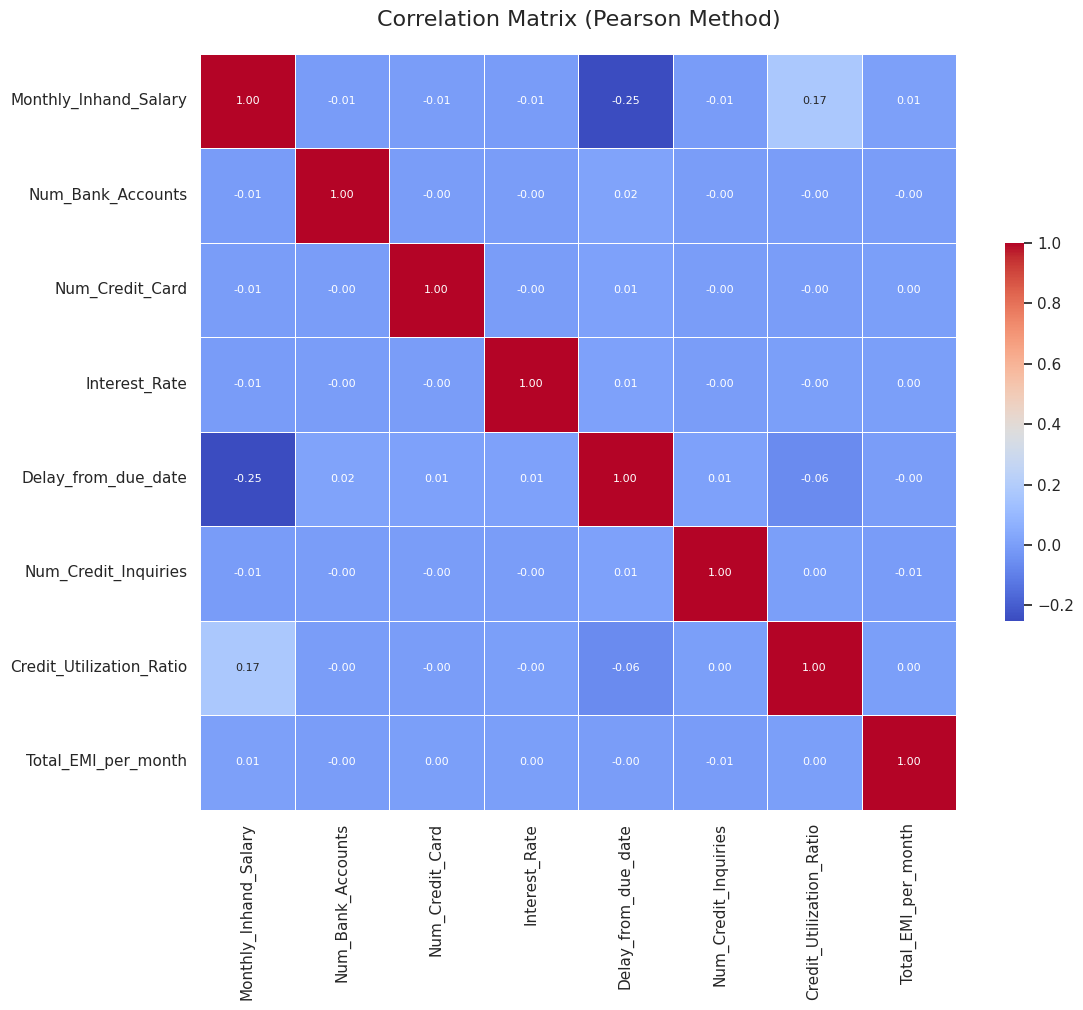

In [108]:
fig, corr = create_correlation_heatmap(df)
# # To identify most correlated features
# # Get the absolute correlation values and sort
corr_abs = corr.abs().unstack()
corr_abs = corr_abs[corr_abs < 1.0]  # Remove self-correlations
high_correlations = corr_abs.sort_values(ascending=False)[:10]  # Top 10
print("Top 10 highest correlations:")
print(high_correlations)